In [32]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, kurtosis,gaussian_kde
from scipy.stats.mstats import mode, gmean, hmean
import matplotlib.pyplot as plt
%matplotlib inline 

In [40]:
import seaborn as sns
sns.set(color_codes=True)

In [24]:
state=pd.read_csv("state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [25]:
trim_mean=trim_mean(state['Population'],0.1)
mean=state['Population'].mean()
median=state['Population'].median()

print "Trimmed mean : %s" %trim_mean
print "Mean: %s" %mean
print "Median: %s" %median


Trimmed mean : 4783697.125
Mean: 6162876.3
Median: 4436369.5


In [27]:
w=round(np.average(state['Murder.Rate'], weights=state['Population']),2)
print "Weighted Mean: %s" %w

Weighted Mean: 4.45


In [31]:
std=state['Population'].std()
iqr=state['Population'].quantile(0.75)-state['Population'].quantile(0.25) #75% percentile-25%percentile
mad=state['Population'].mad()
print "Standard Deviation: %s" %std
print "Interquartile Range: %s" %iqr
print "Mean Absolute Deviation: %s" %mad

Standard Deviation: 6848235.3474
Interquartile Range: 4847308.0
Mean Absolute Deviation: 4450933.356


### Percentiles and Boxplot 

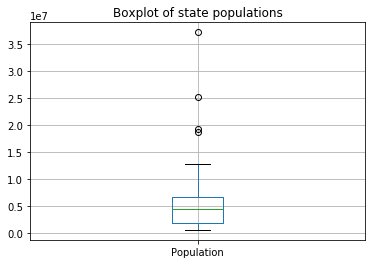

In [36]:
box=state[['Population']].boxplot(showfliers=True)
box.set_title("Boxplot of state populations")


### Frequency Table and Histograms

(array([ 24.,  14.,   6.,   2.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([   563626.,   4232659.,   7901692.,  11570725.,  15239758.,
         18908791.,  22577824.,  26246857.,  29915890.,  33584923.,
         37253956.]),
 <a list of 10 Patch objects>)

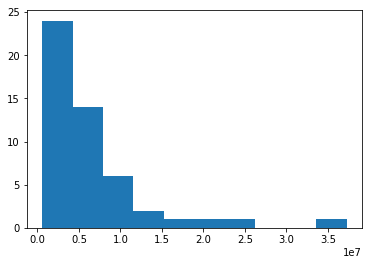

In [39]:
plt.hist(state["Population"], bins=10)

### Density Plot 

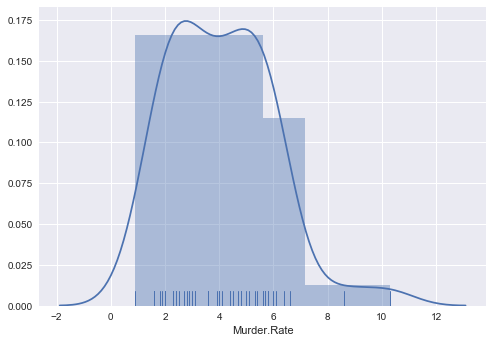

In [41]:
sns.distplot(state["Murder.Rate"], hist=True, rug=True)


### Exploring Two or more variables

In [85]:
kc_tax=pd.read_csv("kc_tax.csv")
tax=kc_tax.loc[(kc_tax["TaxAssessedValue"] < 750000) & (kc_tax["SqFtTotLiving"]>100) & (kc_tax["SqFtTotLiving"]<3500)]

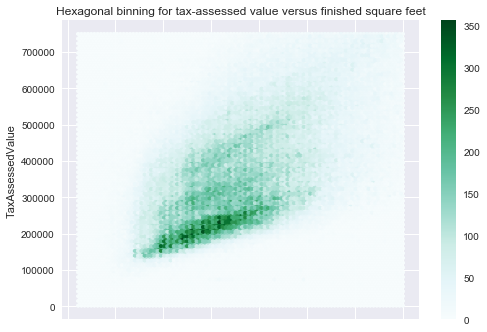

In [88]:
tax[['SqFtTotLiving','TaxAssessedValue']].plot(kind='hexbin', x='SqFtTotLiving', y='TaxAssessedValue',title="Hexagonal binning for tax-assessed value versus finished square feet")


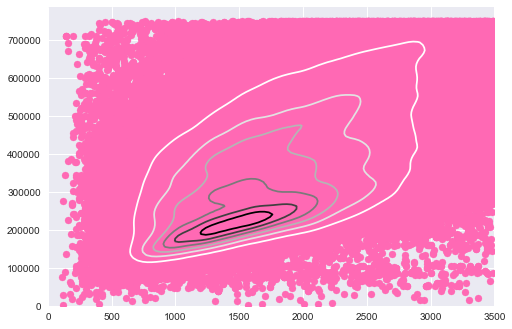

In [102]:
x1=tax['SqFtTotLiving'].as_matrix()
y1=tax['TaxAssessedValue'].as_matrix()

fig, ax = plt.subplots(nrows=1,ncols=1)

ax.scatter(x1,y1,color='hotpink')

def density_estimation(m1, m2):
    X, Y = np.mgrid[0:3500:100j, 0:700000:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

X, Y, Z = density_estimation(x1, y1)

H, xedges, yedges = np.histogram2d(x1,y1)
extent = [xedges[0],xedges[-1],yedges[0],yedges[-1]]
cset1 = ax.contour(X,Y,Z,extent=extent)